A ML Model was trained and SHAP approach was employed to identify which of the molecular descriptors among the ones present were important and contribute more towards the model preditions.

In [1]:
import pandas as pd
import os

# Specify the directory path where the Excel files are located
directory_path = 'D:\combo_IC50_skew_kurt_data'  # Replace with the actual directory path

# Get a list of Excel files in the specified directory
csv_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Loop through the Excel files and concatenate them
for file in csv_files:
    df = pd.read_csv(file)  # Read each Excel file
    concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

# Now, 'concatenated_df' contains the combined data from all Excel files in the specified directory.

# You can further process or save the concatenated DataFrame as needed.
valid_data = pd.read_csv(r'D:\combo_IC50_skew_kurt_data\validation\chunk_14.csv')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [3]:
X = concatenated_df.drop('Combo IC50', axis = 1)


In [4]:
Y = concatenated_df['Combo IC50']
Y = pd.DataFrame(Y)


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 26)

In [6]:
# Example of feature selection using Random Forest feature importances
from sklearn.ensemble import RandomForestRegressor


In [8]:

# Your data loading and model training code
# Assuming you have already defined and split your x_train and y_train data
regressor = RandomForestRegressor(max_depth=10, max_leaf_nodes=10, n_estimators=100, random_state=4002, min_samples_split=5, min_samples_leaf=2)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### An Over view on SHAP:

SHAP (SHapley Additive exPlanations) is a popular method for explaining individual predictions in machine learning models. It provides a way to understand the impact of different features on model predictions. Here's a brief introduction to SHAP and its role in model training:

### Introduction to SHAP:

SHAP values aim to explain the prediction of an instance by calculating the contribution of each feature to the prediction. These values help in understanding the importance of each feature in the model's output. Positive SHAP values indicate a feature positively contributed to the prediction, while negative SHAP values suggest the feature had a negative impact on the prediction.

### Positive and Negative Scores:

1. Positive SHAP values: These indicate that the corresponding feature has a positive impact on the prediction. Higher positive values suggest a stronger influence on the model's output.

2. Negative SHAP values: These imply that the corresponding feature has a negative effect on the prediction. Higher negative values suggest a stronger adverse impact on the model's output.

### Role in Model Training:

SHAP values play a crucial role in model training and evaluation:

1. Feature Importance Identification: SHAP values help identify which features are most influential in making predictions. They provide insights into how changes in input features affect the model's output, allowing users to prioritize important features for decision-making.

2. Model Interpretability: By using SHAP values, users can interpret the model's predictions and understand the reasons behind specific decisions. This interpretability is crucial for gaining trust in complex machine learning models.

3. Debugging and Improvement: Analyzing SHAP values can help in debugging models, identifying biases, and improving overall model performance by understanding the impact of individual features.

Overall, SHAP-based feature importance identification contributes to better model understanding, interpretability, and the overall transparency of machine learning models, making it an essential tool in the model training and evaluation process.

In [11]:
import shap
# Fit the model to the training data
regressor.fit(X_train, Y_train)

# Initialize the SHAP explainer
explainer = shap.Explainer(regressor)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [12]:
# Calculate SHAP values for a specific prediction (e.g., the first test sample)
shap_values = explainer.shap_values(X_test.iloc[0])
shap_values

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
# Visualize the SHAP values for that prediction using a force plot
shap.initjs()  # Initialize JavaScript visualization (required for force plots)
shap.force_plot(explainer.expected_value[0], shap_values, X_test.iloc[0])


In [14]:
import numpy as np
# Assuming you have already calculated shap_values for a specific prediction

# Calculate the absolute SHAP values for the specific prediction
abs_shap_values = np.abs(shap_values)

# Sort the absolute SHAP values in descending order to identify the top features
sorted_indices = np.argsort(abs_shap_values)[::-1]

# Select the top 20 features and their corresponding SHAP values
top_20_indices = sorted_indices[:20]
top_20_features = X_test.columns[top_20_indices]
top_20_shap_values = shap_values[top_20_indices]


In [15]:
# Create a DataFrame with only the top 20 features for the specific prediction
top_20_features_df = X_test.iloc[0][top_20_features]


In [18]:
top_20_features_df

Library IC50     0.651041
Delta Emax       0.859040
Combo Emax       0.390918
Delta Xmid       0.885479
TDB4p.1         -3.274524
MLFER_A.3        0.091570
minsOH.1        -0.760653
ATSC8c.1_x      -0.228028
SpMax2_Bhs.2    -1.236096
ATSC5s.1_x       0.245999
ATSC5m.1        -0.814795
nHBint9.2        0.378628
maxHssNH.2      -2.146899
nHBint2.1       -0.006279
maxHBint2.2_x    0.694450
nHBint4_x       -1.223958
maxHBd_x         0.248656
MLFER_S          0.107031
minsCH3.3        0.656300
maxHCsatu.2_x    0.420288
Name: 33898, dtype: float64

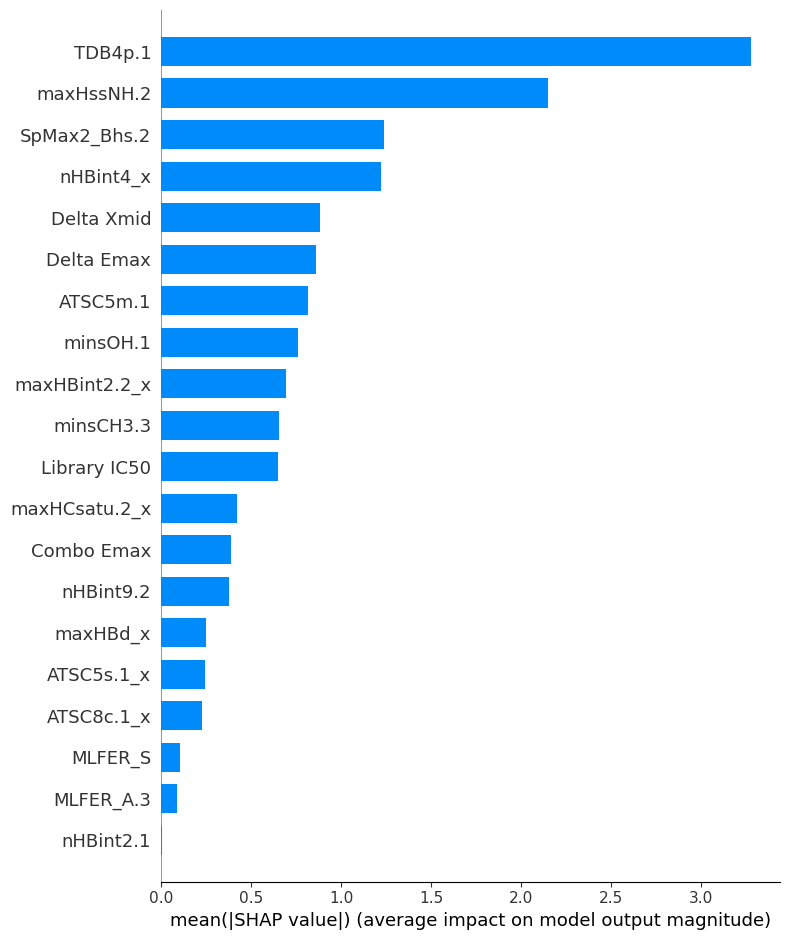

In [17]:
# Convert the top 20 features DataFrame to a matrix-like format
top_20_features_matrix = top_20_features_df.values.reshape(1, -1)

# Visualize the top 20 features and their SHAP values as a bar plot with feature names on the y-axis
shap.summary_plot(top_20_features_matrix, top_20_features_matrix, plot_type='bar', feature_names=top_20_features)

In [ ]:
# Fit the model to the training data
regressor.fit(X_train, Y_train)

# Initialize the SHAP explainer
explainer = shap.Explainer(regressor)

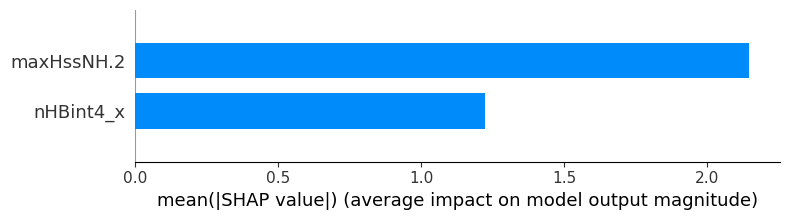

Top 20 Positive Score SHAP Values:
[0.0, 0.0]


In [27]:
# Calculate SHAP values for a specific prediction (e.g., the first test sample)
shap_values = explainer.shap_values(X_test.iloc[0])

# Calculate the absolute SHAP values
abs_shap_values = np.abs(shap_values)

# Sort the absolute SHAP values in descending order to identify the top features
sorted_indices = np.argsort(abs_shap_values)[::-1]

# Separate positive and negative SHAP values
positive_indices = sorted_indices[shap_values > 0]
negative_indices = sorted_indices[shap_values < 0]

# Select the top 20 positive features and their corresponding SHAP values
top_20_positive_indices = positive_indices[:20]
top_20_positive_features = X_test.columns.to_numpy()[top_20_positive_indices]
top_20_positive_shap_values = shap_values[top_20_positive_indices]

# Create a list of top 20 positive score SHAP values
top_20_positive_shap_values_list = top_20_positive_shap_values.tolist()

# Create a DataFrame with only the top 20 positive features for the specific prediction
top_20_positive_features_df = X_test.iloc[0][top_20_positive_features]

# Convert the top 20 positive features DataFrame to a matrix-like format
top_20_positive_features_matrix = top_20_positive_features_df.values.reshape(1, -1)

# Create a summary plot for the top 20 positive score SHAP values
shap.summary_plot(top_20_positive_features_matrix, top_20_positive_features_matrix, plot_type='bar', feature_names=top_20_positive_features, title="Top 20 Positive Score SHAP Values")
import matplotlib.pyplot as plt
%matplotlib inline
# Show the plot
plt.show()

# Print the list of top 20 positive score SHAP values
print("Top 20 Positive Score SHAP Values:")
print(top_20_positive_shap_values_list)


In [21]:
top_20_positive_features_df

maxHssNH.2   -2.146899
nHBint4_x    -1.223958
Name: 33898, dtype: float64

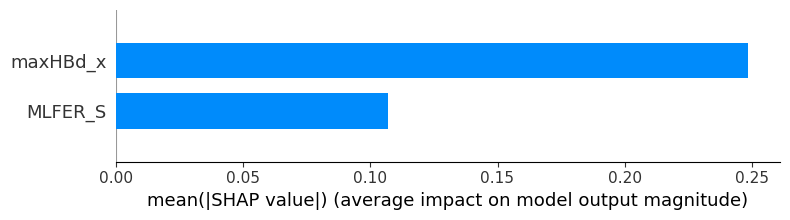

Top 20 Negative Score SHAP Values:
[0.0, 0.0]


In [23]:
# Select the top 20 positive features and their corresponding SHAP values
top_20_negative_indices = negative_indices[:20]
top_20_negative_features = X_test.columns.to_numpy()[top_20_negative_indices]
top_20_negative_shap_values = shap_values[top_20_negative_indices]

# Create a list of top 20 positive score SHAP values
top_20_negative_shap_values_list = top_20_negative_shap_values.tolist()

# Create a DataFrame with only the top 20 positive features for the specific prediction
top_20_negative_features_df = X_test.iloc[0][top_20_negative_features]

# Convert the top 20 positive features DataFrame to a matrix-like format
top_20_negative_features_matrix = top_20_negative_features_df.values.reshape(1, -1)

# Create a summary plot for the top 20 positive score SHAP values
shap.summary_plot(top_20_negative_features_matrix, top_20_negative_features_matrix, plot_type='bar', feature_names=top_20_negative_features, title="Top 20 Negative Score SHAP Values")

# Show the plot
plt.show()

# Print the list of top 20 positive score SHAP values
print("Top 20 Negative Score SHAP Values:")
print(top_20_negative_shap_values_list)

In [24]:
top_20_negative_features_df

maxHBd_x    0.248656
MLFER_S     0.107031
Name: 33898, dtype: float64